# Data Processing: Pharma CSV

A checklist by Spiracular@gmail.com



Data source: https://www.kaggle.com/milanzdravkovic/pharma-sales-data

(Possible additional data: https://en.wikipedia.org/wiki/List_of_largest_selling_pharmaceutical_products , probably originally from IMS Health (Midas). Requires a lot of cleaning, and might have to BeautifulSoup it.)

Data description (opt): https://www.kaggle.com/milanzdravkovic/pharma-sales-data

<div style="white-space: pre-wrap; padding: 10px; background-color: #ebebeb;">The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use
Sales data are resampled to the hourly, daily, weekly and monthly periods. Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.
</div>

# Step 0: Libraries and Read In

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook # zoomable

In [3]:
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
#import math

In [ ]:
#from numpy import random

## Step 0.5: Read CSV

In [14]:
df = pd.read_csv("data/PharmaSales/salesmonthly.csv")

# Step 1: Cleaning and Relabeling

In [15]:
df.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06'],
      dtype='object')

In [16]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [17]:
df.dtypes

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object

In [18]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


## Step 1.1: Types and Relabeling

In [21]:
df.columns = ["Month", "AntiInf_acetic", "AntiInf_propionic", "AgAp_salicyclic", "AgAp_pyrazones", "Psylep_anxiolytic", "Psylep_hypnotic", "AntiOPD", "Antihistamines"]

In [22]:
df.head()

,Month,AntiInf_acetic,AntiInf_propionic,AgAp_salicyclic,AgAp_pyrazones,Psylep_anxiolytic,Psylep_hypnotic,AntiOPD,Antihistamines
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


## Step 1.2: Nans

In [30]:
# Get coordinates of nans
s = df.stack(dropna=False) ## See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html
L = [list(x) for x in s.index[s.isna()]]
print (L)

[]


# STOP AUTO-RUN

In [ ]:
assert False

# Step 2: EDA and Histograms

In [48]:
df.columns

Index(['Month', 'AntiInf_acetic', 'AntiInf_propionic', 'AgAp_salicyclic',
       'AgAp_pyrazones', 'Psylep_anxiolytic', 'Psylep_hypnotic', 'AntiOPD',
       'Antihistamines'],
      dtype='object')

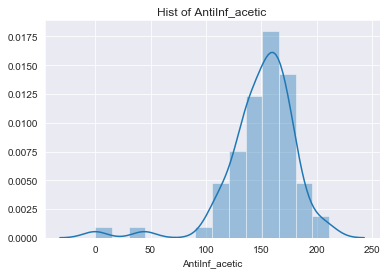

In [28]:
colname = "AntiInf_acetic"

####

plt.title("Hist of " + colname)

#plt.hist(df[colname])

sns.distplot(df[colname])

In [41]:
# Automatically applied column-wise

def mean_normalize(df):
    mean_normalized_df=(df-df.mean())/df.std()
    return mean_normalized_df

def minmax_normalize(df):
    minmax_normalized_df=(df-df.min())/(df.max()-df.min())
    return minmax_normalized_df

In [42]:
mn_df = mean_normalize(df.loc[:, df.columns != 'Month'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba8c52ed0>,
      dtype=object)

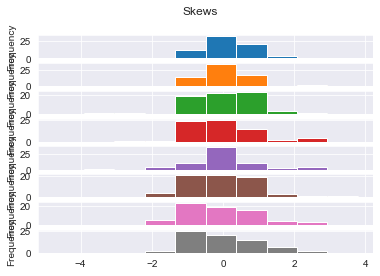

In [45]:
mn_df.plot.hist(subplots=True, legend=False, title="Skews")

# Step 3: State Goals

## Inputs

## Outputs

## Brainstorm

In [13]:
df.head()

,Month,AntiI_acetic,AntiI_propionic,AgAp_salicyclic,AgAp_pyrazones,Psylep_anxiolytic,Psylep_hypnotic,AntiOPD,Antihistamines
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


## Step 3.1: More Cleaning

# Step 4: Derived Metrics and Pivot Tables

(as needed)